# Importing the libraries

In [1]:
import sys
print(sys.executable)

/Users/olabodeaguda/opt/anaconda3/bin/python


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#NLP tools
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input director
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olabodeaguda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Importing the dataset

In [3]:
dataset = pd.read_csv('labeled_data.csv')
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


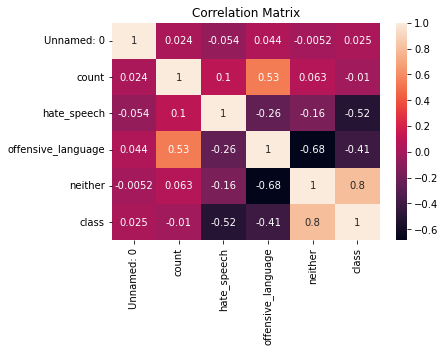

In [5]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [6]:
dataset.corr()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
Unnamed: 0,1.000000,0.023947,-0.054345,0.043773,-0.005187,0.024525
count,0.023947,1.000000,0.101926,0.534604,0.063326,-0.010029
hate_speech,-0.054345,0.101926,1.000000,-0.261808,-0.157599,-0.515732
offensive_language,0.043773,0.534604,-0.261808,1.000000,-0.684406,-0.410440
neither,-0.005187,0.063326,-0.157599,-0.684406,1.000000,0.800687
class,0.024525,-0.010029,-0.515732,-0.410440,0.800687,1.000000


In [7]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset[['count', 'hate_speech', 'offensive_language', 'neither']] = scaler.fit_transform(dataset[['count', 'hate_speech', 'offensive_language', 'neither']])
print(dataset.head())



   Unnamed: 0  count  hate_speech  offensive_language   neither  class  \
0           0    0.0          0.0            0.000000  0.333333      2   
1           1    0.0          0.0            0.333333  0.000000      1   
2           2    0.0          0.0            0.333333  0.000000      1   
3           3    0.0          0.0            0.222222  0.111111      1   
4           4    0.5          0.0            0.666667  0.000000      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


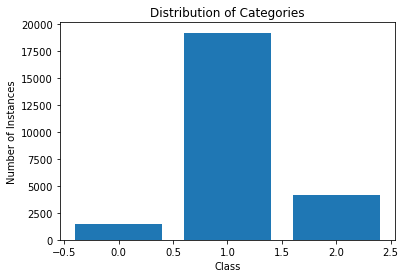

In [8]:
counts = dataset['class'].value_counts()

# Plot the bar chart
plt.bar(counts.index, counts.values)
plt.title("Distribution of Categories")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.show()

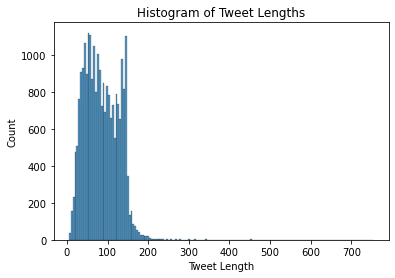

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset['tweet_length'] = dataset['tweet'].str.len()

sns.histplot(dataset['tweet_length'], kde=False)
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          24783 non-null  int64  
 1   count               24783 non-null  float64
 2   hate_speech         24783 non-null  float64
 3   offensive_language  24783 non-null  float64
 4   neither             24783 non-null  float64
 5   class               24783 non-null  int64  
 6   tweet               24783 non-null  object 
 7   tweet_length        24783 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.500000,12703.000000,18995.500000,25296.0
count,24783.0,0.040579,0.147177,0.0,0.000000,0.000000,0.000000,1.0
hate_speech,24783.0,0.040074,0.090264,0.0,0.000000,0.000000,0.000000,1.0
offensive_language,24783.0,0.268190,0.155495,0.0,0.222222,0.333333,0.333333,1.0
neither,24783.0,0.061027,0.123700,0.0,0.000000,0.000000,0.000000,1.0
class,24783.0,1.110277,0.462089,0.0,1.000000,1.000000,1.000000,2.0
tweet_length,24783.0,85.436065,41.548238,5.0,52.000000,81.000000,119.000000,754.0


In [12]:
dt_trasformed = dataset[['class', 'tweet']]
y = dt_trasformed.iloc[:, :-1].values

### Encoding the Dependent Variable

In [13]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

I separated this y in two variables that we will use to fit hate speech models and offensive speech models

In [14]:
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])

In [15]:
print(y_hate)
print(y_offensive)

[0. 0. 0. ... 0. 0. 0.]
[0. 1. 1. ... 1. 1. 0.]


## Cleaning the texts

In [16]:
corpus = []
for i in range(0, 24783):
  review = re.sub('[^a-zA-Z]', ' ', dt_trasformed['tweet'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [17]:
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(corpus).toarray()

## Splitting the dataset into the Training set and Test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hate, test_size = 0.20, random_state = 0)

## Finding the best models to predict hate speech

**Naive Bayes**

In [19]:
classifier_np = GaussianNB()
classifier_np.fit(X_train, y_train)

GaussianNB()

**Decision Tree**

In [20]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**KNN**

In [21]:
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

**Logistic Regression**

In [22]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Random Forest**

In [23]:
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Making the Confusion Matrix for each model

In [24]:
#Naive Bayes
y_pred_np = classifier_np.predict(X_test)
cm = confusion_matrix(y_test, y_pred_np)
print(cm)

np_score = accuracy_score(y_test, y_pred_np)
print('Naive Bayes Accuracy: ', str(np_score))


[[1969 2709]
 [  90  189]]
Naive Bayes Accuracy:  0.43534395803913656


In [25]:
#Decision Tree
y_pred_dt = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

dt_score = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy: ', str(dt_score))


[[4455  223]
 [ 188   91]]
Decision Tree Accuracy:  0.9170869477506557


In [26]:
#Linear Regression
y_pred_lr = classifier_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)


lr_score = accuracy_score(y_test, y_pred_lr)
print('Linear Regression Accuracy: ', str(lr_score))


[[4614   64]
 [ 229   50]]
Linear Regression Accuracy:  0.940891668347791


In [27]:
#Random Florest
y_pred_rf = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

rf_score = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy: ', str(rf_score))


[[4586   92]
 [ 213   66]]
Random Forest Accuracy:  0.9384708493040145
